# Notebook to show some predictions for the dataset EMOVO

In [21]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf

## Load the model

In [22]:
# load the tensorflow model
model = tf.keras.models.load_model('models/model.h5')
target_size = (400, 400)
labels = ['dis', 'gio', 'neu', 'pau', 'rab', 'sor', 'tri']
actors = ['f1', 'f2', 'f3', 'm1', 'm2', 'm3']

## Load a random audio file

File: sor-m1-b3.wav


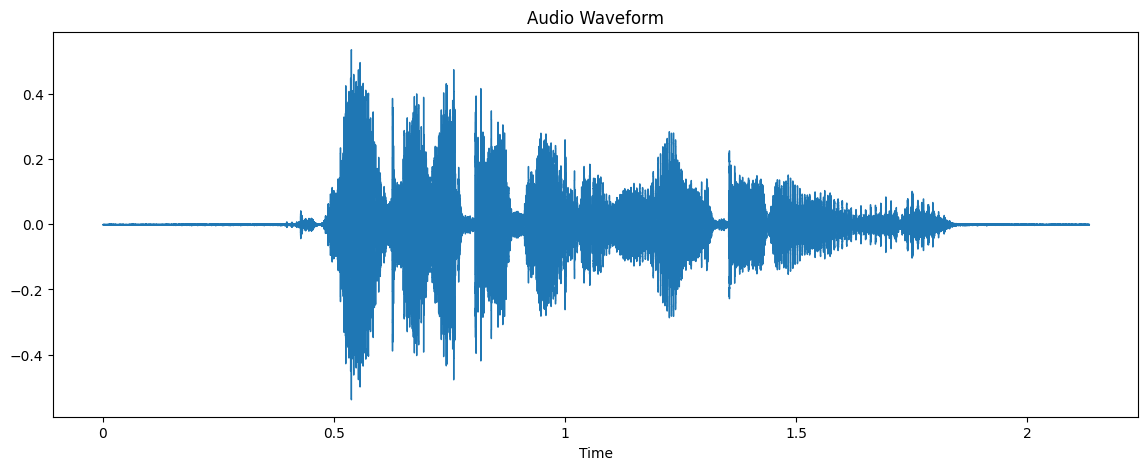

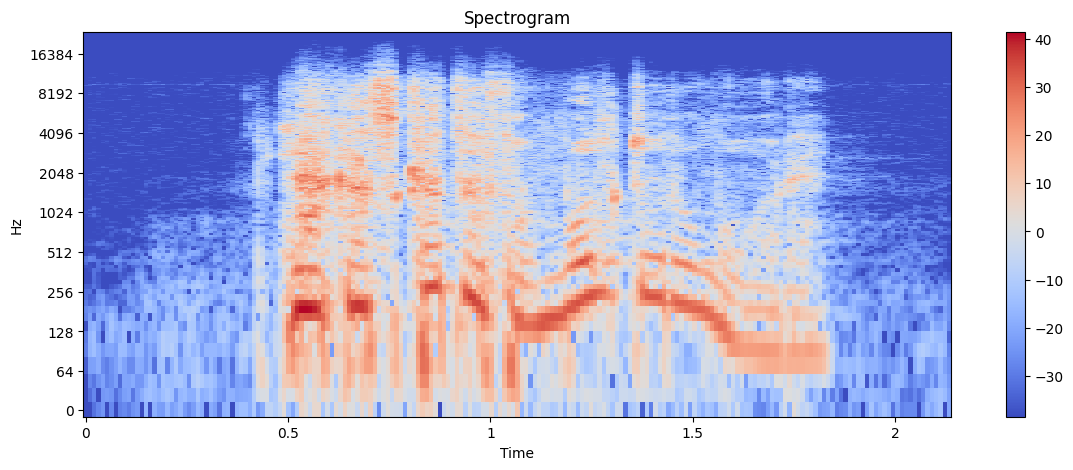

In [23]:
# load a random audio file
actor = np.random.choice(actors)

path = 'audio' +os.sep+ actor +os.sep

audios = os.listdir(path)

file_name = np.random.choice(audios)
file = path + file_name

print('File:', file_name)

x, sr = librosa.load(file, sr=None)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

plt.title('Audio Waveform')

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Spectrogram')

Audio(file, rate=sr)

## Predict the emotion

In [24]:
image = tf.keras.utils.load_img('images'+os.sep+file_name+'.png', target_size=target_size)

img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model(img_array)[0]
predictions = tf.nn.softmax(predictions)
predictions = predictions.numpy()

print('File:', file_name)
print(predictions)

predicted_class = labels[predictions.argmax(axis=-1)]
real_class = file_name.split('-')[0]

# print the prediction
print(f"Predicted sound: {predicted_class} at {predictions.max()*100:.2f}%")
print("Actual sound:", real_class)
if predicted_class == real_class:
    print("*** Correct prediction! ***")

File: sor-m1-b3.wav
[0.1147015  0.1147015  0.1147015  0.31179097 0.1147015  0.1147015
 0.1147015 ]
Predicted sound: pau at 31.18%
Actual sound: sor
